In [ ]:
import numpy as np
import glob 
# !pip install Image
# import Image

# images = []
# for f in glob.iglob("/content/drive/My Drive/immagini-1/immagini-1/*"):
#     images.append(np.asarray(Image.open(f)))

# images = np.array(images)

# print(images)

In [ ]:
from PIL import Image
import glob
import time
image_list = []
i=0
t0=time.time()
for filename in glob.glob('/content/drive/My Drive/immagini-1/immagini-1/*.jpg'): #assuming gif
    im=Image.open(filename)
    filename = filename[46:]
    filename = filename.replace(".jpg","")
    filename = filename.split("_")
    if i%1000==0: 
      print(i)
      t1 = time.time()
      print("Tempo trascorso: ", end="")
      print(t1-t0)
    i=i+1
    
    image_list.append(im)
print(image_list)


0
Tempo trascorso: 32.280659675598145
1000
Tempo trascorso: 625.0775332450867
2000
Tempo trascorso: 1211.2429468631744
3000
Tempo trascorso: 1783.350961446762
4000
Tempo trascorso: 2356.8236649036407
5000
Tempo trascorso: 2932.539789915085
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A85D668>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F1438>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F15C0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F1748>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F18D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F1A58>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F1BE0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F1C50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F1B3A7F1DD8>, <PIL.JpegImagePlugin.JpegImage

In [ ]:
import glob
labels = []
for filename in glob.glob('/content/drive/My Drive/immagini-1/immagini-1/*.jpg'): 
    filename = filename[46:]
    filename = filename.replace(".jpg","")
    filename = filename.split("_")
    if i%1000==0: 
      print(i)
    i=i+1
    labels.append(filename)

6000
7000
8000
9000
10000
11000


In [ ]:
label = [ k[0] for k in labels]
idimg = [ k[1] for k in labels]

In [ ]:
unique_labels=np.unique(label)
l = 0
tmp = {}
for key in unique_labels:
  tmp[key]=l
  l=l+1
unique_labels = tmp

In [ ]:
len(image_list)

5985

In [ ]:
import pandas as pd
label = pd.Series(label)

In [ ]:
import matplotlib.pyplot as plt

def plot_image(np_array):
    plt.figure()
    plt.imshow(np_array,cmap='gray')
    plt.show()

In [ ]:
image_vector = [pd.Series(np.array(img.convert('L')).flatten()) for img in image_list]
print(image_vector[0].shape)

(4800,)


In [ ]:
image_vector = pd.DataFrame(image_list)
print(image_vector.iloc[0])


0    <PIL.JpegImagePlugin.JpegImageFile image mode=...
Name: 0, dtype: object


In [ ]:
plot_image(image_vector.iloc[3999])

In [ ]:
image_vector['label'] = label

In [ ]:
def f(x):
  return unique_labels[x]
image_vector['label'] = image_vector['label'].apply(f)

In [ ]:
image_vector = image_vector.drop_duplicates()
image_vector = image_vector.dropna()
x = image_vector.drop("label",axis=1)
y = image_vector['label']

In [ ]:
x = image_vector.drop("label",axis=1)
y = image_vector['label']

In [ ]:
# SAVE DATAFRAME
x.to_pickle('/content/drive/My Drive/pickled_dataset/Immagini/x.pkl')
y.to_pickle('/content/drive/My Drive/pickled_dataset/Immagini/y.pkl')

In [ ]:
import pandas as pd
# READ DATAFRAME
x = pd.read_pickle('/content/drive/My Drive/pickled_dataset/Immagini/x.pkl')
y = pd.read_pickle('/content/drive/My Drive/pickled_dataset/Immagini/y.pkl')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=8735,
                                                   stratify=y)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_new = pca.fit_transform(x_test)

In [ ]:
y.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5975, 5976, 5977, 5978, 5979, 5980, 5981, 5982, 5983, 5984],
           dtype='int64', length=5976)

In [ ]:
tmp = pd.DataFrame(data=y)
tmp['sss']=np.zeros(y.shape[0])
tmp.groupby(by='label').count()

,sss
label,
0,649
1,2560
2,1579
3,1188


In [ ]:
# don't execute!

print(y_train.unique())
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
plt.scatter(x_new[:,0], x_new[:,1], c=y_test, marker='o', label=y_train.unique())
plt.legend(loc='upper left')
plt.show()

In [ ]:
models = {}
models_history = []
def save_model(name, model):
  if name not in models:
    models[name]=[model]
  else:
    models[name].append(model)
  
  if len(models_history)>=10:
    models_history.pop(0)
  print(name + " saved!")
  
  models_history.append((name,model))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
save_model("adaboost",clf.fit(x_train,y_train))

adaboost saved!


In [ ]:
for m in models_history:
  print(m[0],end=" ")
  print(m[1].score(x_test,y_test))

adaboost 0.7265886287625418


In [ ]:
from sklearn import svm
svm_clf = svm.SVC(random_state=12039,C=20)
#scores = cross_val_score(clf, X, y, cv=5)
save_model("SVM",svm_clf.fit(x_train,y_train))

SVM saved!


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(priors=[0.25,0.25,0.25,0.25])
l = clf.fit(x_train,y_train)
print(l.score(x_test,y_test))
#save_model("GMM",clf.fit(x_train,y_train))

0.7817725752508361


In [ ]:
print("Meausures of the last hypothesis")
if len(models_history)!=0:
  print(models_history[len(models_history)-1][1].score(x_test,y_test))
else:
  print("\t> Empty clf history!")

Meausures of the last hypothesis
-95817649644.50693


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__
keras.__version__

'2.3.0-tf'

Needed pre-processing for CNN

1.   List item
2.   List item



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0
Running on TPU  ['10.23.240.154:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.23.240.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.23.240.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
# da fare 
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.values.reshape(x_train.shape[0], 60, 80,1)
x_test = x_test.values.reshape(x_test.shape[0], 60, 80,1)

In [ ]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(shape=(60*80,)))
# model.add(keras.layers.Dense(3000, activation="relu"))
# model.add(keras.layers.Dense(50, activation="relu"))
# model.add(keras.layers.Dense(20, activation="relu"))
# model.add(keras.layers.Dense(4, activation="softmax"))

import keras
import tensorflow as tf
def getNewModel():
  res = keras.models.Sequential([
  keras.layers.Conv2D(64,10, activation="relu", padding="same", input_shape=[60,80,1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(4, activation="softmax")
  ])
  return res

Using TensorFlow backend.


In [ ]:
model.summary()

In [ ]:
x = x.to_numpy().reshape(x.shape[0], 60, 80,1)
modelli = []

In [ ]:
from numpy import array
from sklearn.model_selection import KFold

# def kfoldcv(classifier):
kf = KFold(n_splits=10,shuffle=True,random_state=43)
kf.get_n_splits(x) # RIMETTERE x PER CONSIDERARE TUTTO IL DATASET 
scores = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", len(train_index), "TEST:", len(test_index), end=" ")
    x_train_cv, x_test_cv = x[train_index], x[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    # clf = classifier.fit(x_train_cv,y_train_cv)
    model = getNewModel()
    model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
    model.fit(x_train_cv,  y_train_cv, epochs=65)
    s = model.evaluate(x_test_cv, y_test_cv, verbose=0)
    scores.append(s)
    modelli.append(model)
    print(s)
print(scores)
# return np.array(scores)

# scores = kfoldcv(net)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
model_conva = getNewModel()
model_conva.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']);

aug = ImageDataGenerator(rotation_range=5,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,
                         shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [ ]:
EPOCHS = 3

h_aug = model_conva.fit_generator(aug.flow(x_train,y_train),validation_data=(x_test,y_test), steps_per_epoch=len(x_train), epochs=EPOCHS)
history_aug = h_aug.history
#hist_plot(history_aug,'CNN with data augmentation')

score_conv = model_conva.evaluate(x_test, y_test, verbose=0)
augs = score_conv[1]
path = "/content/drive/My Drive/ModelliSalvati/Immagini/Classificatori"
model_conva.save(path+"/cnn.h5")

Epoch 1/3
4780/4780 [==============================] - 666s 139ms/step - loss: 0.0486 - accuracy: 0.9840 - val_loss: 0.1946 - val_accuracy: 0.9515
Epoch 2/3
4780/4780 [==============================] - 665s 139ms/step - loss: 0.0421 - accuracy: 0.9859 - val_loss: 0.1774 - val_accuracy: 0.9574
Epoch 3/3
4780/4780 [==============================] - 664s 139ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.1901 - val_accuracy: 0.9599


In [ ]:
import numpy as np
for s in scores:
  print(s[1],end=" ")
print(" ")
sc = [s[1] for s in scores]
sc = np.array(sc)

0.9665551781654358 0.9849498271942139 0.9732441306114197 0.9698996543884277 0.9665551781654358 0.9581939578056335 0.9748743772506714 0.8693467378616333 0.9597989916801453 0.9681742191314697  


In [ ]:
print("CNN Accuracy 10fold cross-validation:", sc.mean())
for s in scores:
  print(s[1])
print(" ")

CNN Accuracy 10fold cross-validation: 0.9591592252254486
0.9665551781654358
0.9849498271942139
0.9732441306114197
0.9698996543884277
0.9665551781654358
0.9581939578056335
0.9748743772506714
0.8693467378616333
0.9597989916801453
0.9681742191314697
 


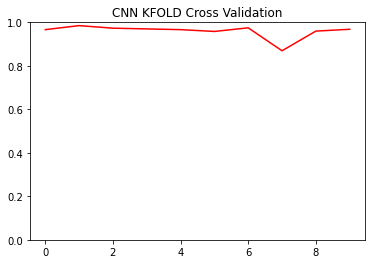

In [ ]:
import matplotlib.pyplot as plt
p = plt.plot(sc,scaley=False,color="r")
plt.title("CNN KFOLD Cross Validation")
plt.savefig("/content/drive/My Drive/ModelliSalvati/Immagini/Classificazione/cnn.png")

In [ ]:
best_model = modelli[sc.argmax()]
path = "/content/drive/My Drive/ModelliSalvati/Immagini/Classificatori"
best_model.save(path+"/cnn.h5")

In [ ]:
 model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test)) # about 64 epoch

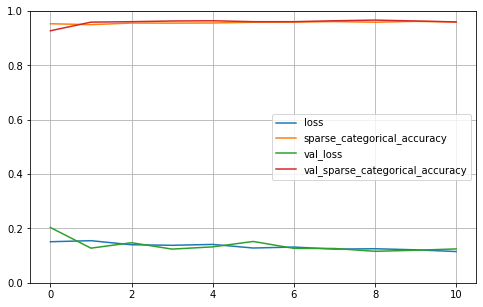

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# SAVE CNN TO FS
model.save("/content/drive/My Drive/pickled_dataset/models/img/model_adam.h5")

In [ ]:
# READ CNN FROM FS
from keras.models import load_model
import h5py
model = tf.keras.models.load_model('/content/drive/My Drive/pickled_dataset/models/img/model_adam.h5')

In [ ]:
for m in models_history:
  print(m[0],end=" ")
  print(m[1].score(x_test,y_test))

adaboost 0.7525083612040134
SVM 0.9749163879598662
adaboost 0.7265886287625418


In [ ]:
x = x.reshape(x.shape[0],60*80)

In [ ]:
y.shape

In [ ]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
from sklearn import svm
modelli = []
def kfoldcv(classifier):
  kf = KFold(n_splits=10,shuffle=True,random_state=43)
  kf.get_n_splits(x)
  scores = []
  for train_index, test_index in kf.split(x):
      print("TRAIN:", len(train_index), "TEST:", len(test_index), end=" ")
      x_train_cv, x_test_cv = x[train_index], x[test_index]
      y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
      clf = classifier.fit(x_train_cv,y_train_cv)
      s = clf.score(x_test_cv,y_test_cv)
      scores.append(s)
      modelli.append(clf)
      print(s)

  return np.array(scores)
  
from sklearn.ensemble import AdaBoostClassifier
scores = kfoldcv(AdaBoostClassifier(n_estimators=200, random_state=0))
from sklearn.naive_bayes import GaussianNB
#scores = kfoldcv(svm.SVC(random_state=12039,C=20))
#scores = kfoldcv(GaussianNB(priors=[0.25,0.25,0.25,0.25])) # C=20

TRAIN: 5378 TEST: 598 0.7357859531772575
TRAIN: 5378 TEST: 598 0.6488294314381271
TRAIN: 5378 TEST: 598 0.617056856187291
TRAIN: 5378 TEST: 598 0.6454849498327759
TRAIN: 5378 TEST: 598 0.5819397993311036
TRAIN: 5378 TEST: 598 0.6321070234113713
TRAIN: 5379 TEST: 597 0.5628140703517588
TRAIN: 5379 TEST: 597 0.5829145728643216
TRAIN: 5379 TEST: 597 0.6415410385259631
TRAIN: 5379 TEST: 597 0.5360134003350083


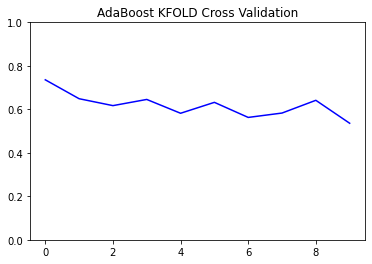

In [ ]:
import pickle
name = "AdaBoost"
best_model = modelli[scores.argmax()]
filename = '/content/drive/My Drive/ModelliSalvati/Immagini/Classificatori/'+name+'.sav'
pickle.dump(best_model, open(filename, 'wb'))
import matplotlib.pyplot as plt
plt.plot(scores,scaley=False,color="b")
plt.title(name+" KFOLD Cross Validation")
plt.savefig("/content/drive/My Drive/ModelliSalvati/Immagini/Classificatori/"+name+".png")

In [ ]:
import numpy as np
print("mean accuracy: ", scores.mean()," var:", scores.var())

mean accuracy:  0.7588732402256545  var: 0.0002263999082350022
